<a href="https://colab.research.google.com/github/LeonMwangi123/PLP-week-3/blob/main/decision_tree_classifier%C2%A0to_predict_iris_species_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset directly from sklearn
iris = load_iris()

# Create a DataFrame for easier manipulation and inspection
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("Dataset successfully loaded. First 5 rows:")
print(df.head())



Dataset successfully loaded. First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [7]:
# 1. Handle Missing Values
# Even though Iris is usually clean, we check for nulls to ensure robustness
if df.isnull().values.any():
    df = df.dropna()
    print("Missing values found and removed.")
else:
    print("No missing values detected.")

# 2. Feature Selection
# X = measurements (Features), y = species type (Target)
X = df.drop('species', axis=1)
y = df['species']

# 3. Train-Test Split
# We split the data into 80% for training and 20% for testing
# to see how the model performs on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split complete: {len(X_train)} training samples, {len(X_test)} testing samples.")

No missing values detected.
Data split complete: 120 training samples, 30 testing samples.


In [8]:
# Initialize the Decision Tree Classifier
# We use 'entropy' to measure how well the tree splits the classes
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Decision Tree training complete.")

Decision Tree training complete.


--- Model Evaluation ---
Overall Accuracy: 100.00%

Detailed Classification Report (Precision & Recall):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



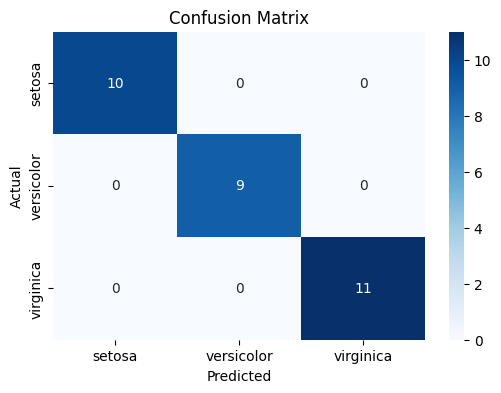

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"--- Model Evaluation ---")
print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print("\nDetailed Classification Report (Precision & Recall):")
print(report)

# Confusion Matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

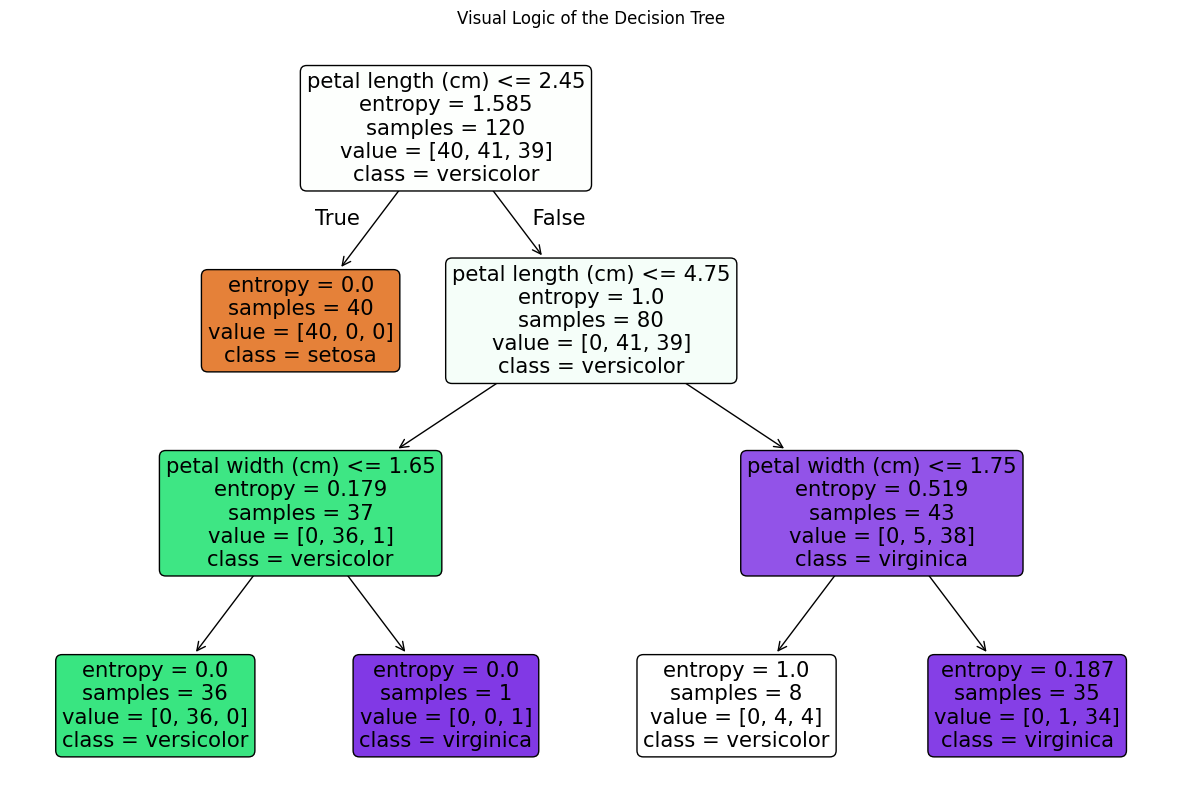

In [10]:
# Visualize the logic of the trained tree
plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=list(iris.target_names),
          filled=True,
          rounded=True)
plt.title("Visual Logic of the Decision Tree")
plt.show()